<a href="https://colab.research.google.com/github/SherlynVironica/PSDS-Mahir-7.0/blob/main/Final_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import metrics
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
import itertools
import numpy as np

In [ ]:
path_source = '/content/drive/MyDrive/archive_13'

categories_in_path_x = os.listdir(path_source)
print(categories_in_path_x)

['iris-virginica', 'iris-versicolour', 'iris-setosa']


In [ ]:
imgs = []
labels = []
list_data = []
data_single = []
for category in categories_in_path_x:
  list_img_name =  os.listdir(os.path.join(path_source,category))
  for img_name in list_img_name:
    img = cv2.imread(os.path.join(path_source,category,img_name))
    if category == 'iris-setosa':
       label = 0
    elif category == 'iris-versicolour':
      label = 1
    else:
     label = 2
    data_single = [img, label, img_name]
    list_data.append(data_single)
    imgs.append(img)
    labels.append(label)

arr_imgs = np.array(imgs)
arr_label = np.array(label)

In [ ]:
imgs = np.array(imgs)
np.shape(imgs)

(421, 256, 256, 3)

In [ ]:
print(labels)

from keras.utils import to_categorical
labels_binary = to_categorical(labels)

labels_binary

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

train_and_validation_x, test_x, train_and_validation_y_with_name, test_y_with_name = train_test_split(imgs, labels_binary, test_size=0.2, random_state=1)
train_x, validation_x, train_y_with_name, validation_y_with_name = train_test_split(train_and_validation_x, train_and_validation_y_with_name, test_size=0.2, random_state=1)

In [ ]:
train_x = np.array(train_x)
train_y_with_name =  np.array(train_y_with_name)
test_x = np.array(test_x)
test_y_with_name =  np.array(test_y_with_name)
validation_x = np.array(validation_x)
validation_y_with_name =  np.array(validation_y_with_name)

In [ ]:
print(np.shape(train_x))
print(np.shape(train_y_with_name))
print(np.shape(test_x))
print(np.shape(validation_x))

(268, 256, 256, 3)
(268, 3)
(85, 256, 256, 3)
(68, 256, 256, 3)


In [ ]:
train_x = train_x.reshape(-1, 256, 256, 1)
test_x = test_x.reshape(-1, 256, 256, 1)
validation_x = validation_x.reshape(-1, 256, 256, 1)
train_x = train_x / 255.0
train_y_with_name = train_y_with_name / 255.0
test_x = test_x / 255.0
validation_x = validation_x / 255.0

In [ ]:
print(np.shape(train_x))
print(np.shape(train_y_with_name))
print(np.shape(test_x))
print(np.shape(validation_x))

(804, 256, 256, 1)
(268, 3)
(255, 256, 256, 1)
(204, 256, 256, 1)


In [ ]:
train_x = train_x.reshape(-1, 256, 256, 3)
test_x = test_x.reshape(-1, 256, 256, 3)
validation_x = validation_x.reshape(-1, 256, 256, 3)

In [ ]:
print(np.shape(train_x))
print(np.shape(train_y_with_name))
print(np.shape(test_x))
print(np.shape(validation_x))

(268, 256, 256, 3)
(268, 3)
(85, 256, 256, 3)
(68, 256, 256, 3)


In [ ]:
# set learning rate, epochs and batch size
# INIT_LR = 1e-5    # This value is specific to what model is chosen: Inception, VGG or ResNet etc.
EPOCHS = 100
BS = 8
# num_classes = 2

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Training the full stack model...")
breastcancer_train = model.fit(train_x, train_y_with_name, batch_size=BS, steps_per_epoch=len(train_x) // BS,
                         validation_data=(test_x, test_y_with_name), validation_steps=len(test_x) // BS, epochs=EPOCHS)

Training the full stack model...
Epoch 1/100
33/33 [==============================] - 17s 481ms/step - loss: 0.1948 - accuracy: 0.3485 - val_loss: 40.5895 - val_accuracy: 0.1750
Epoch 2/100
33/33 [==============================] - 16s 478ms/step - loss: 0.1710 - accuracy: 0.3692 - val_loss: 73.2048 - val_accuracy: 0.2000
Epoch 3/100
33/33 [==============================] - 16s 487ms/step - loss: 0.2270 - accuracy: 0.3692 - val_loss: 9.4596 - val_accuracy: 0.5125
Epoch 4/100
33/33 [==============================] - 16s 480ms/step - loss: 0.2269 - accuracy: 0.3308 - val_loss: 92.7599 - val_accuracy: 0.6250
Epoch 5/100
33/33 [==============================] - 16s 484ms/step - loss: 0.3853 - accuracy: 0.3615 - val_loss: 208.9000 - val_accuracy: 0.2000
Epoch 6/100
33/33 [==============================] - 16s 491ms/step - loss: 0.8804 - accuracy: 0.3423 - val_loss: 365.1052 - val_accuracy: 0.1750
Epoch 7/100
33/33 [==============================] - 16s 488ms/step - loss: 1.3912 - accuracy: 0

Evaluating the trained model ...
11/11 [==============================] - 0s 31ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.62      1.00      0.77        53
           2       0.00      0.00      0.00        15

    accuracy                           0.62        85
   macro avg       0.21      0.33      0.26        85
weighted avg       0.39      0.62      0.48        85

[[ 0 17  0]
 [ 0 53  0]
 [ 0 15  0]]


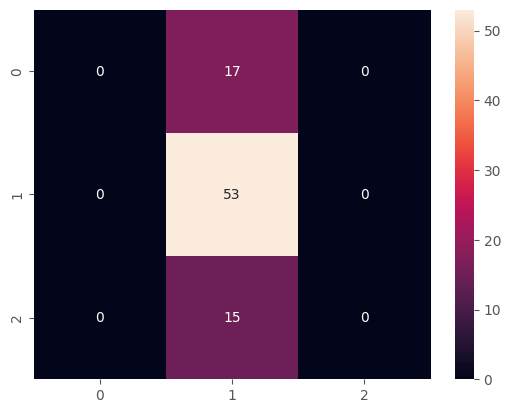

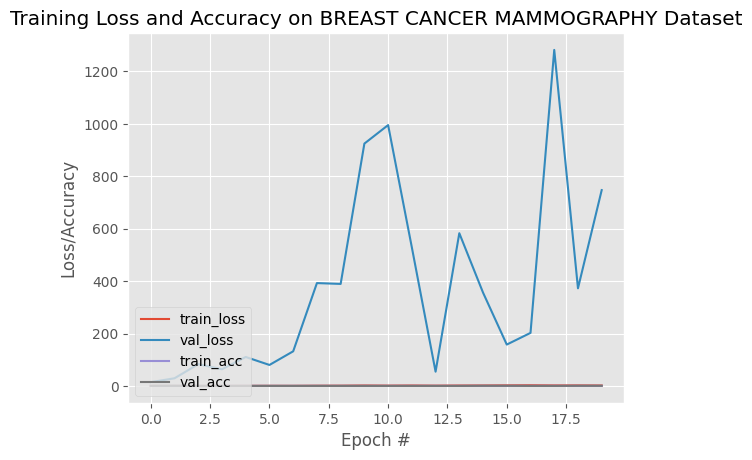

In [ ]:
import seaborn as sb
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

print("Evaluating the trained model ...")
predIdxs = model.predict(test_x, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(test_y_with_name.argmax(axis=1), predIdxs))

# calculate a basic confusion matrix
cm = confusion_matrix(test_y_with_name.argmax(axis=1), predIdxs)
sb.heatmap(cm, annot=True)

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
# print("accuracy: {:.4f}".format(accuracy))
# print("sensitivity: {:.4f}".format(sensitivity))
# print("specificity: {:.4f}".format(specificity))

# plot the training loss and accuracy
N = 20
plt.style.use("ggplot")
plt.figure()
# Use breastcancer_train instead of pneumonia_train
plt.plot(np.arange(0, N), breastcancer_train.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), breastcancer_train.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), breastcancer_train.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), breastcancer_train.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on BREAST CANCER MAMMOGRAPHY Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
# plt.savefig("./Covid19/s-class-plot.png")

In [ ]:
print("Training the full stack model...")
pneumonia_train = model.fit(train_x, train_y_with_name, batch_size=BS, steps_per_epoch=len(train_x) // BS,
                         validation_data=(test_x, test_y_with_name), validation_steps=len(test_x) // BS, epochs=EPOCHS)

Training the full stack model...
Epoch 1/20
33/33 [==============================] - 21s 623ms/step - loss: 3.0873 - accuracy: 0.3598 - val_loss: 763.0781 - val_accuracy: 0.6250
Epoch 2/20
33/33 [==============================] - 15s 462ms/step - loss: 3.3454 - accuracy: 0.3192 - val_loss: 1725.3578 - val_accuracy: 0.2000
Epoch 3/20
33/33 [==============================] - 15s 467ms/step - loss: 3.4616 - accuracy: 0.3192 - val_loss: 503.8531 - val_accuracy: 0.2000
Epoch 4/20
33/33 [==============================] - 16s 487ms/step - loss: 2.4401 - accuracy: 0.3269 - val_loss: 851.6328 - val_accuracy: 0.1750
Epoch 5/20
33/33 [==============================] - 15s 468ms/step - loss: 3.4071 - accuracy: 0.2923 - val_loss: 1996.1047 - val_accuracy: 0.1750
Epoch 6/20
33/33 [==============================] - 15s 467ms/step - loss: 4.0663 - accuracy: 0.3269 - val_loss: 1029.6296 - val_accuracy: 0.2000
Epoch 7/20
33/33 [==============================] - 15s 467ms/step - loss: 3.6300 - accuracy: 

Evaluating the trained model ...
11/11 [==============================] - 1s 41ms/step
              precision    recall  f1-score   support

           0       0.20      1.00      0.33        17
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        15

    accuracy                           0.20        85
   macro avg       0.07      0.33      0.11        85
weighted avg       0.04      0.20      0.07        85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[17  0  0]
 [53  0  0]
 [15  0  0]]


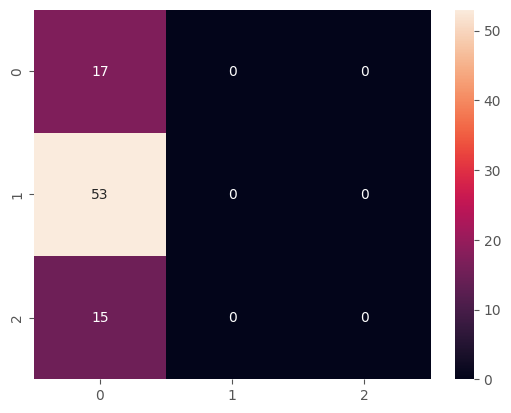

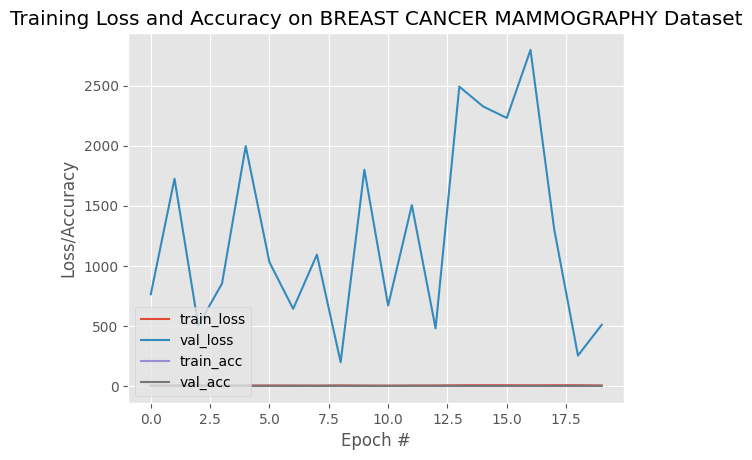

In [ ]:
import seaborn as sb
from sklearn.metrics import classification_report, confusion_matrix

print("Evaluating the trained model ...")
predIdxs = model.predict(test_x, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(test_y_with_name.argmax(axis=1), predIdxs))

# calculate a basic confusion matrix
cm = confusion_matrix(test_y_with_name.argmax(axis=1), predIdxs)
sb.heatmap(cm, annot=True)

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
# print("accuracy: {:.4f}".format(accuracy))
# print("sensitivity: {:.4f}".format(sensitivity))
# print("specificity: {:.4f}".format(specificity))

# plot the training loss and accuracy
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), pneumonia_train.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), pneumonia_train.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), pneumonia_train.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), pneumonia_train.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on BREAST CANCER MAMMOGRAPHY Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
# plt.savefig("./Covid19/s-class-plot.png")

In [ ]:
from keras.callbacks import *
filepath="/content/drive/My Drive/CNNModel3/epochs:{epoch:03d}-val_acc:{val_accuracy:.3f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
print("Training the full stack model...")
pneumonia_train = model.fit(train_x, train_y_with_name, batch_size=BS, steps_per_epoch=len(train_x) // BS,
                         validation_data=(test_x, test_y_with_name), validation_steps=len(test_x) // BS, epochs=17, callbacks=callbacks_list)

Training the full stack model...
Epoch 1/17
33/33 [==============================] - ETA: 0s - loss: 3.1001 - accuracy: 0.3258
Epoch 1: val_accuracy improved from -inf to 0.21250, saving model to /content/drive/My Drive/CNNModel3/epochs:001-val_acc:0.213.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 22s 662ms/step - loss: 3.1001 - accuracy: 0.3258 - val_loss: 263.1625 - val_accuracy: 0.2125
Epoch 2/17
33/33 [==============================] - ETA: 0s - loss: 7.0013 - accuracy: 0.3769
Epoch 2: val_accuracy did not improve from 0.21250
33/33 [==============================] - 17s 507ms/step - loss: 7.0013 - accuracy: 0.3769 - val_loss: 4927.1187 - val_accuracy: 0.1750
Epoch 3/17
33/33 [==============================] - ETA: 0s - loss: 4.6929 - accuracy: 0.3731
Epoch 3: val_accuracy improved from 0.21250 to 0.62500, saving model to /content/drive/My Drive/CNNModel3/epochs:003-val_acc:0.625.h5
33/33 [==============================] - 16s 503ms/step - loss: 4.6929 - accuracy: 0.3731 - val_loss: 806.0500 - val_accuracy: 0.6250
Epoch 4/17
33/33 [==============================] - ETA: 0s - loss: 5.0154 - accuracy: 0.3615
Epoch 4: val_accuracy did not improve from 0.62500
33/33 [==============================] - 17s 502ms/step - loss: 5.0154 - accura

Evaluating the trained model ...
11/11 [==============================] - 1s 46ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.62      1.00      0.77        53
           2       0.00      0.00      0.00        15

    accuracy                           0.62        85
   macro avg       0.21      0.33      0.26        85
weighted avg       0.39      0.62      0.48        85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 0 17  0]
 [ 0 53  0]
 [ 0 15  0]]


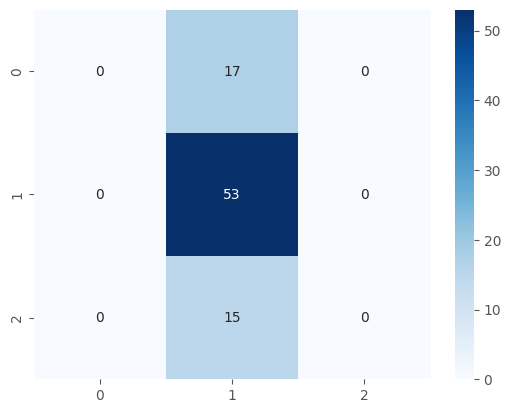

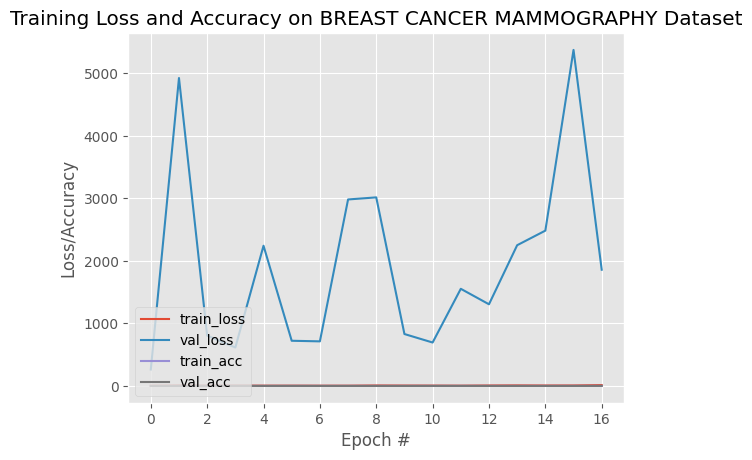

In [ ]:
import seaborn as sb
from sklearn.metrics import classification_report, confusion_matrix

print("Evaluating the trained model ...")
predIdxs = model.predict(test_x, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(test_y_with_name.argmax(axis=1), predIdxs))

# calculate a basic confusion matrix
cm = confusion_matrix(test_y_with_name.argmax(axis=1), predIdxs)
sb.heatmap(cm, annot=True, cmap=plt.cm.Blues)

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
# print("accuracy: {:.4f}".format(accuracy))
# print("sensitivity: {:.4f}".format(sensitivity))
# print("specificity: {:.4f}".format(specificity))

# plot the training loss and accuracy
N = 17
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), pneumonia_train.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), pneumonia_train.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), pneumonia_train.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), pneumonia_train.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on BREAST CANCER MAMMOGRAPHY Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
# plt.savefig("./mammography/s-class-plot.png")

Evaluating the trained model ...
11/11 [==============================] - 0s 29ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.62      1.00      0.77        53
           2       0.00      0.00      0.00        15

    accuracy                           0.62        85
   macro avg       0.21      0.33      0.26        85
weighted avg       0.39      0.62      0.48        85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 0 17  0]
 [ 0 53  0]
 [ 0 15  0]]


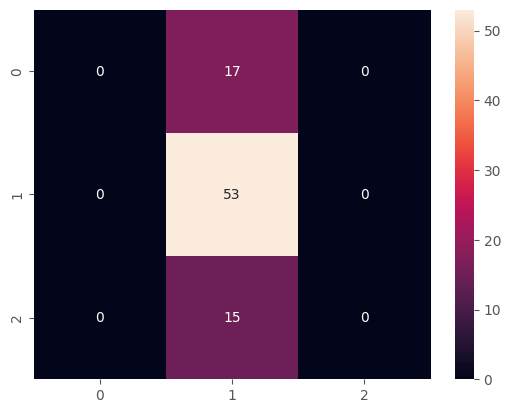

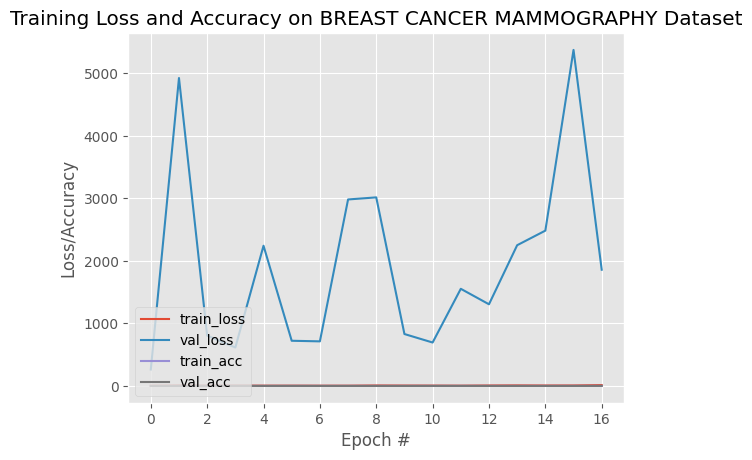

In [ ]:
import seaborn as sb
from sklearn.metrics import classification_report, confusion_matrix

print("Evaluating the trained model ...")
predIdxs = model.predict(test_x, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(test_y_with_name.argmax(axis=1), predIdxs))

# calculate a basic confusion matrix
cm = confusion_matrix(test_y_with_name.argmax(axis=1), predIdxs)
sb.heatmap(cm, annot=True)

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
# print("accuracy: {:.4f}".format(accuracy))
# print("sensitivity: {:.4f}".format(sensitivity))
# print("specificity: {:.4f}".format(specificity))

# plot the training loss and accuracy
N = len(pneumonia_train.history["loss"]) # Set N to the number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), pneumonia_train.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), pneumonia_train.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), pneumonia_train.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), pneumonia_train.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on BREAST CANCER MAMMOGRAPHY Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
# plt.savefig("./Covid19/s-class-plot.png")

Evaluating the predict model ...
9/9 [==============================] - 0s 41ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.54      1.00      0.70        37
           2       0.00      0.00      0.00        20

    accuracy                           0.54        68
   macro avg       0.18      0.33      0.23        68
weighted avg       0.30      0.54      0.38        68

[[ 0 11  0]
 [ 0 37  0]
 [ 0 20  0]]


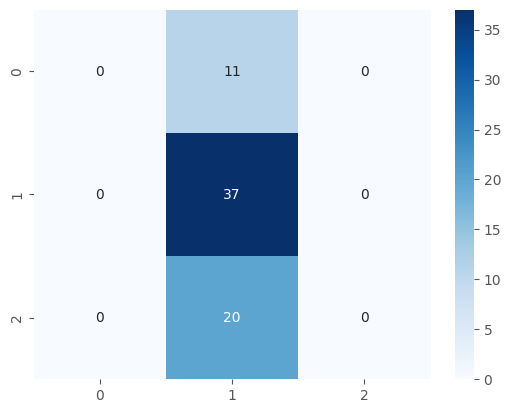

In [ ]:
import seaborn as sb
from sklearn.metrics import classification_report, confusion_matrix

print("Evaluating the predict model ...")
predIdxs = model.predict(validation_x, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(validation_y_with_name.argmax(axis=1), predIdxs))

# calculate a basic confusion matrix
cm = confusion_matrix(validation_y_with_name.argmax(axis=1), predIdxs)
sb.heatmap(cm, annot=True, cmap=plt.cm.Blues)

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)